<a href="https://colab.research.google.com/github/Royahosseinii/6220-project/blob/main/6220_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and diagnosis of Breast cancer**

**Install Pycaret**

In [54]:
!pip install pycaret


**Import Libraries**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [56]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


**Dataset**

The “Breast Cancer diagnosis Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about tumor attributes to diagnosed it as benign or malignant for breast cancer.

There are 5 attributes with 569 entries and one column for classification.
**0 represents Benign and 1 represents Malignant.**


All attributes are numerical and they are listed bellow:

1. mean_radius = MR
2. mean_texture = MT
3. mean_perimeter = MP
4. mean_area = MA
5. mean_smoothness = MS
6. diagnosis (Label)

The original dataset can be found on below link:
https://www.kaggle.com/datasets/theodoravalerie/breast-cancer-data





In [57]:
#read cvs file into dataframe
df = pd.read_csv('/content/6220project.csv')
df.head(25)

,INDUS,DIS,NOX,RAD,TAX,MEDV-result
0,15.664,1.07672,0.6968,4.0,322.4,1
1,6.512,3.38640,0.4304,3.2,245.6,1
2,6.512,3.02976,0.4304,3.2,245.6,1
3,15.664,1.38912,0.6968,4.0,322.4,1
4,6.512,3.19200,0.4304,3.2,245.6,1
5,17.512,1.33488,0.4992,3.2,349.6,1
6,15.664,1.05728,0.6968,4.0,322.4,1
7,6.512,3.00784,0.4304,3.2,245.6,1
8,6.512,3.03832,0.4304,3.2,245.6,1
9,15.664,1.13528,0.6968,4.0,322.4,1


In [58]:
len(df.index)

299

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDUS        299 non-null    float64
 1   DIS          299 non-null    float64
 2   NOX          299 non-null    float64
 3   RAD          299 non-null    float64
 4   TAX          299 non-null    float64
 5   MEDV-result  299 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.1 KB


In [60]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  47


In [61]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

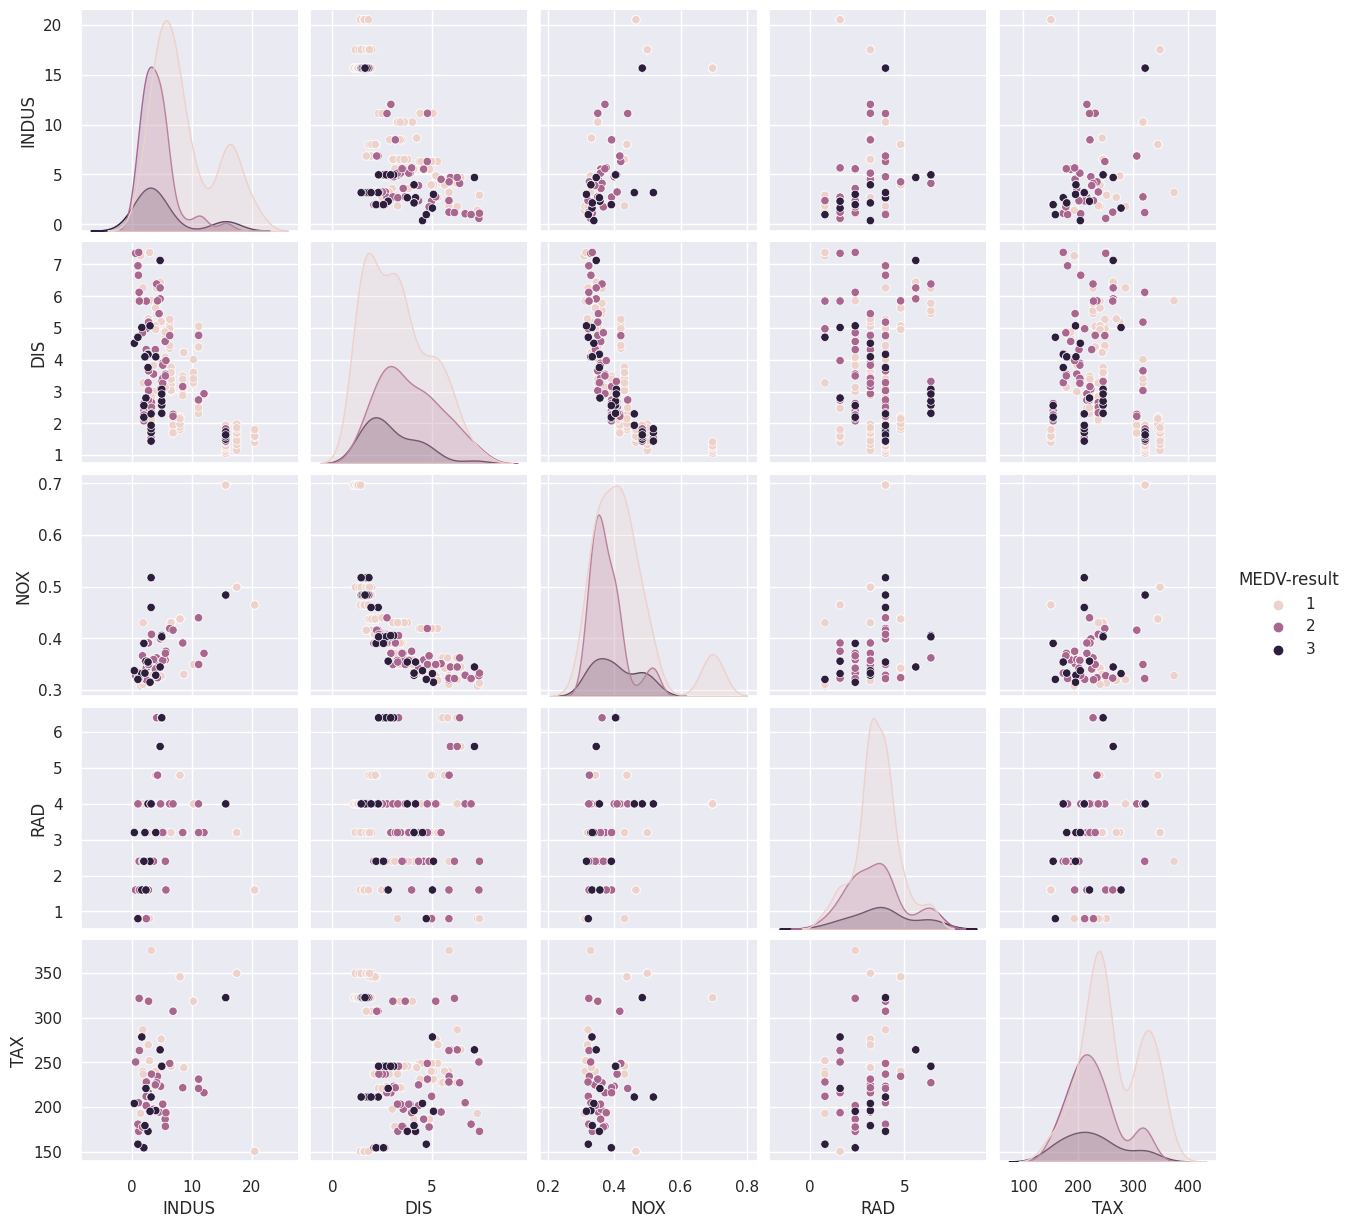

In [62]:
sns.pairplot(df, hue='MEDV-result')
plt.show()

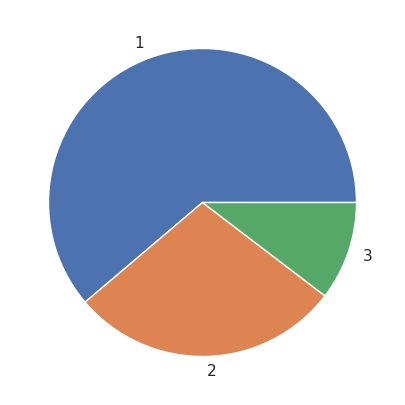

In [63]:
y =df['MEDV-result']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [64]:
X = df.drop(columns=['MEDV-result'])
X.head(10)

,INDUS,DIS,NOX,RAD,TAX
0,15.664,1.07672,0.6968,4.0,322.4
1,6.512,3.38640,0.4304,3.2,245.6
2,6.512,3.02976,0.4304,3.2,245.6
3,15.664,1.38912,0.6968,4.0,322.4
4,6.512,3.19200,0.4304,3.2,245.6
5,17.512,1.33488,0.4992,3.2,349.6
6,15.664,1.05728,0.6968,4.0,322.4
7,6.512,3.00784,0.4304,3.2,245.6
8,6.512,3.03832,0.4304,3.2,245.6
9,15.664,1.13528,0.6968,4.0,322.4


In [65]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INDUS,299.0,7.116629,5.102411,0.36800,3.2400,5.52800,8.47200,20.52000
DIS,299.0,3.413715,1.578463,1.05728,2.0776,3.15632,4.57672,7.37832
NOX,299.0,0.411772,0.087078,0.30800,0.3496,0.39120,0.43760,0.69680
RAD,299.0,3.587960,1.296506,0.80000,3.2000,3.20000,4.00000,6.40000
TAX,299.0,249.511706,55.336149,150.40000,211.2000,245.60000,307.20000,375.20000


**Standardize the Data**

In [66]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,INDUS,DIS,NOX,RAD,TAX
0,1.677972,-1.483032,3.278734,0.318341,1.319400
1,-0.118697,-0.017334,0.214278,-0.299737,-0.070808
2,-0.118697,-0.243654,0.214278,-0.299737,-0.070808
3,1.677972,-1.284787,3.278734,0.318341,1.319400
4,-0.118697,-0.140698,0.214278,-0.299737,-0.070808
5,2.040761,-1.319207,1.005699,-0.299737,1.811765
6,1.677972,-1.495369,3.278734,0.318341,1.319400
7,-0.118697,-0.257564,0.214278,-0.299737,-0.070808
8,-0.118697,-0.238221,0.214278,-0.299737,-0.070808
9,1.677972,-1.445871,3.278734,0.318341,1.319400


In [67]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INDUS,299.0,1.425838e-16,1.001676,-1.324853,-0.761038,-0.311871,0.266079,2.631274
DIS,299.0,1.069379e-16,1.001676,-1.495369,-0.847884,-0.163340,0.738031,2.515897
NOX,299.0,-3.564596e-16,1.001676,-1.193715,-0.715181,-0.236648,0.297101,3.278734
RAD,299.0,5.940993e-17,1.001676,-2.153969,-0.299737,-0.299737,0.318341,2.172573
TAX,299.0,7.129191e-17,1.001676,-1.794087,-0.693506,-0.070808,1.044254,2.275167


**Observations and variables**

In [68]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

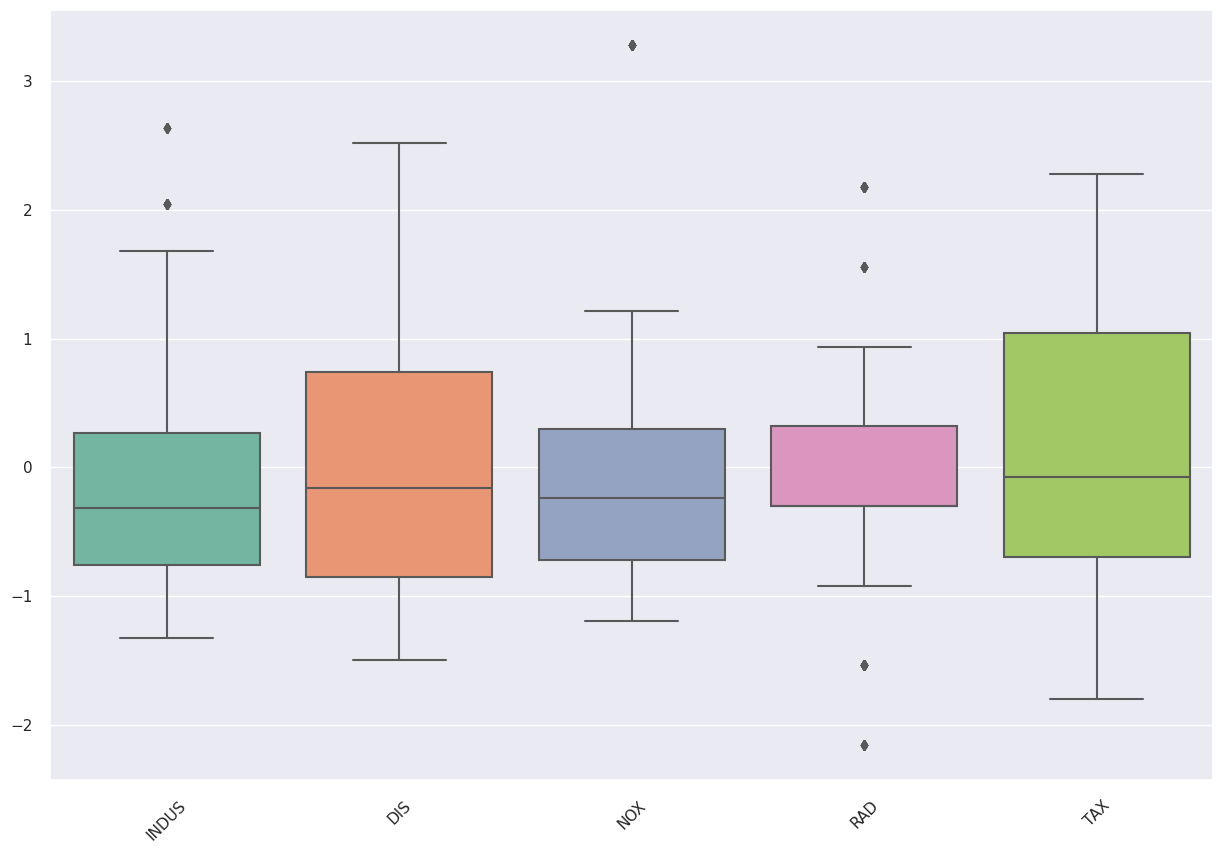

In [69]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

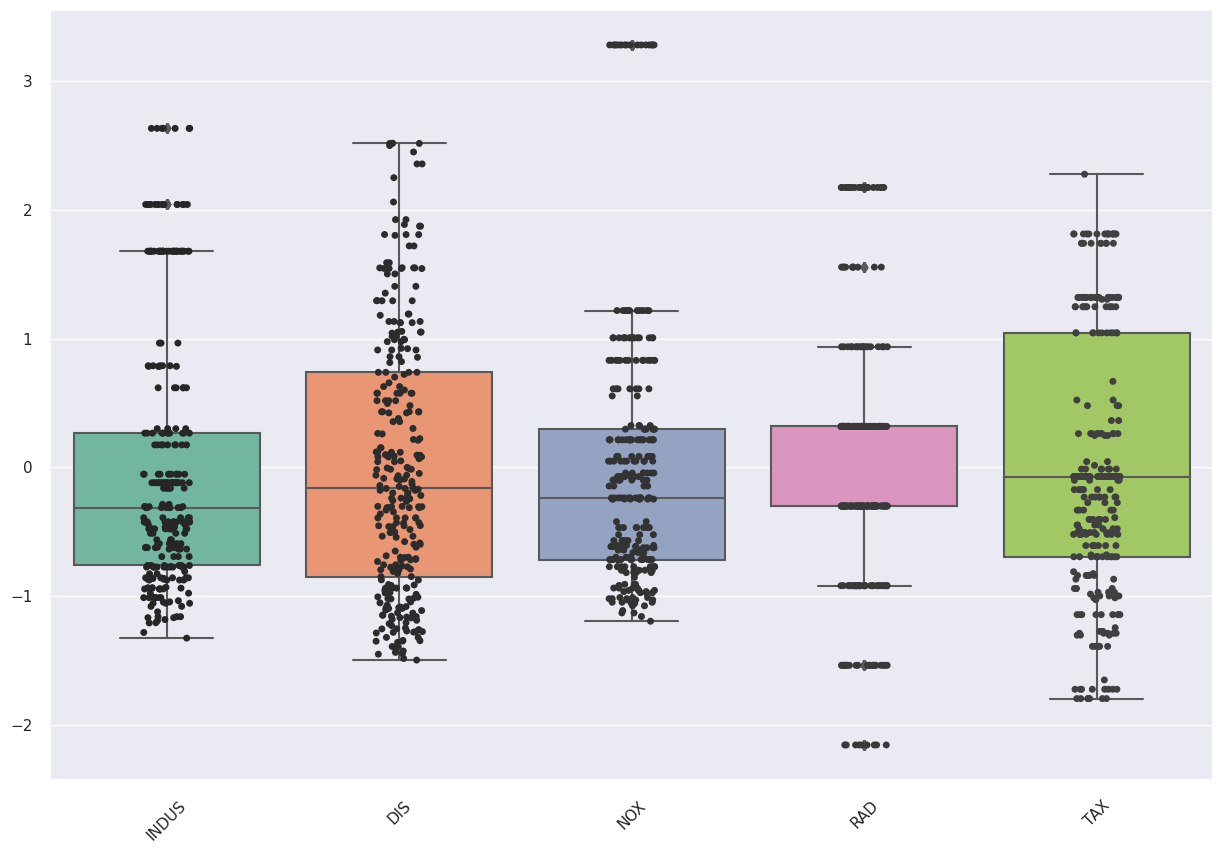

In [70]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

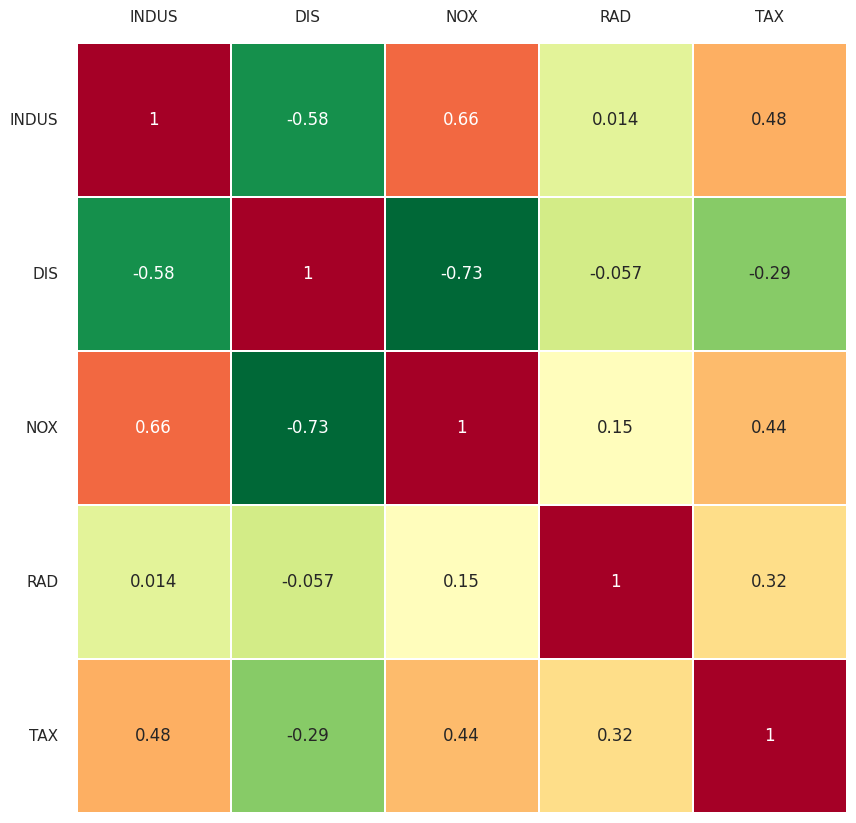

In [71]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

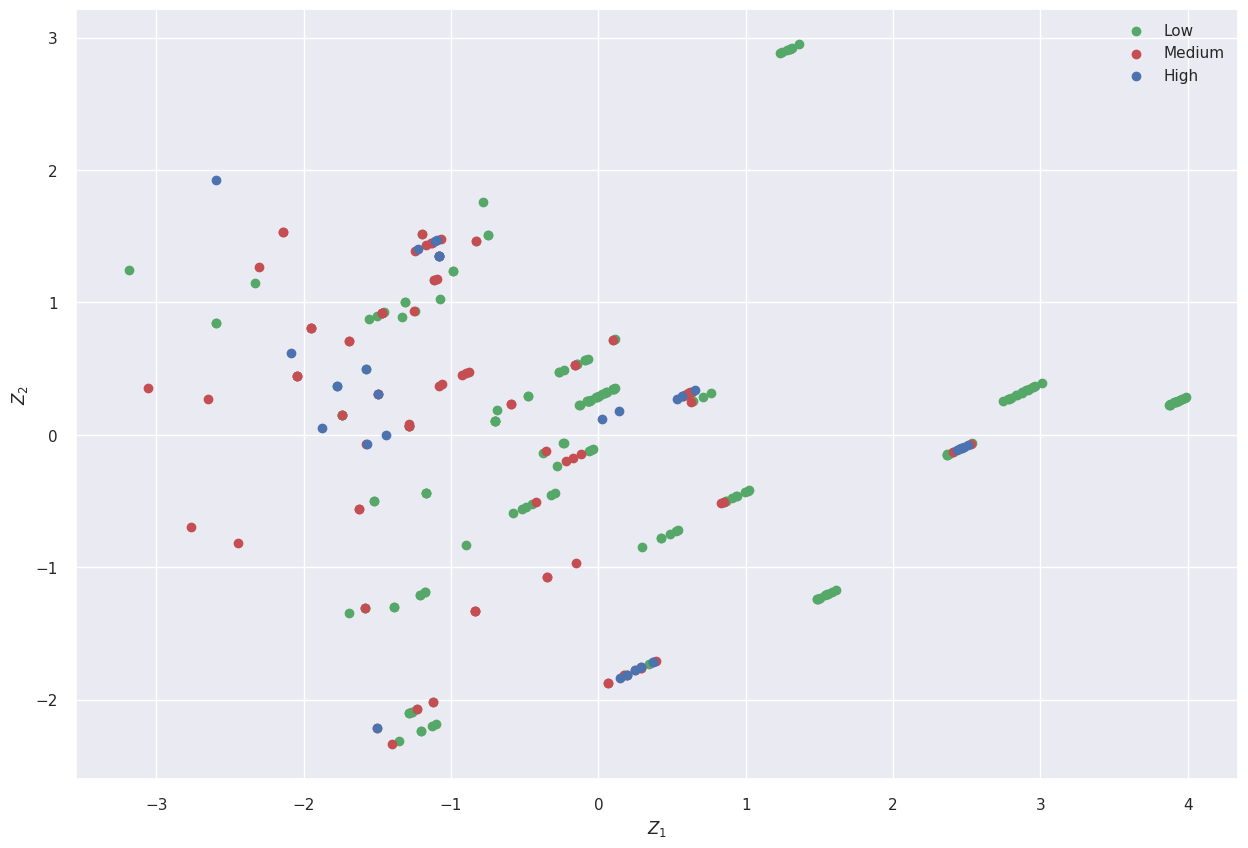

In [72]:
pca = PCA()
Z = pca.fit_transform(X)
y=df['MEDV-result']
# (Malignant)->1,  (Benign)->0

idx_low= np.where(y == 1)
idx_Medium = np.where(y == 2)
idx_high = np.where(y == 3)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_low,0], Z[idx_low,1], c='g', label='Low')
plt.scatter(Z[idx_Medium,0], Z[idx_Medium,1], c='r', label='Medium')
plt.scatter(Z[idx_high,0], Z[idx_high,1], c='b', label='High')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 0.51375584,  0.19333301,  0.2656041 ,  0.76758147, -0.19735864],
       [-0.49859458, -0.2610355 ,  0.45287857,  0.38964024,  0.57126648],
       [ 0.54665868,  0.11706936, -0.22821413, -0.11354684,  0.78897685],
       [ 0.14793094, -0.84249991, -0.4480806 ,  0.24995142, -0.07112241],
       [ 0.40833699, -0.41348698,  0.68665679, -0.42852138, -0.0846245 ]])

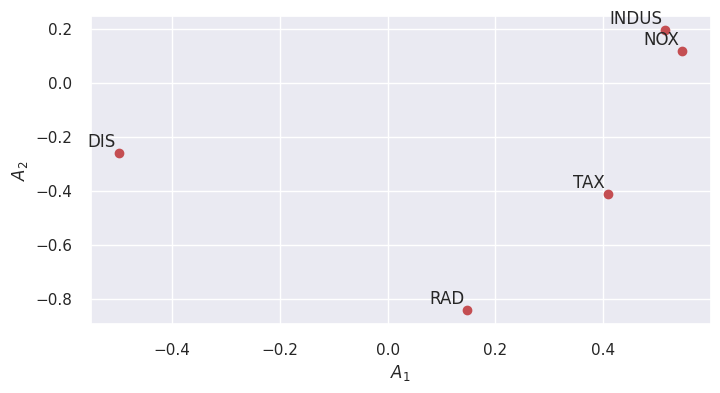

In [73]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

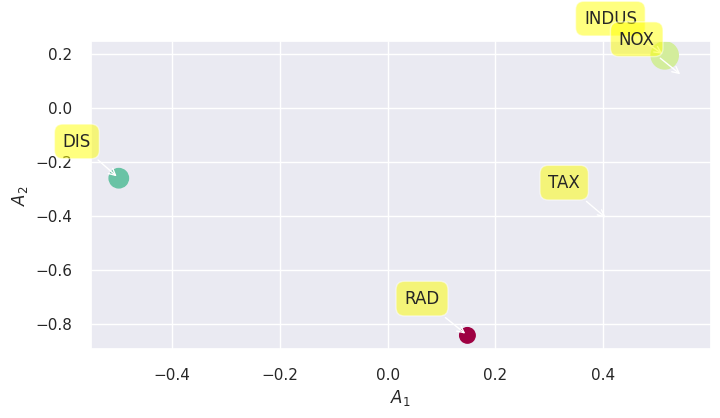

In [74]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([2.66485475, 1.11761126, 0.64224301, 0.3450152 , 0.2470543 ])

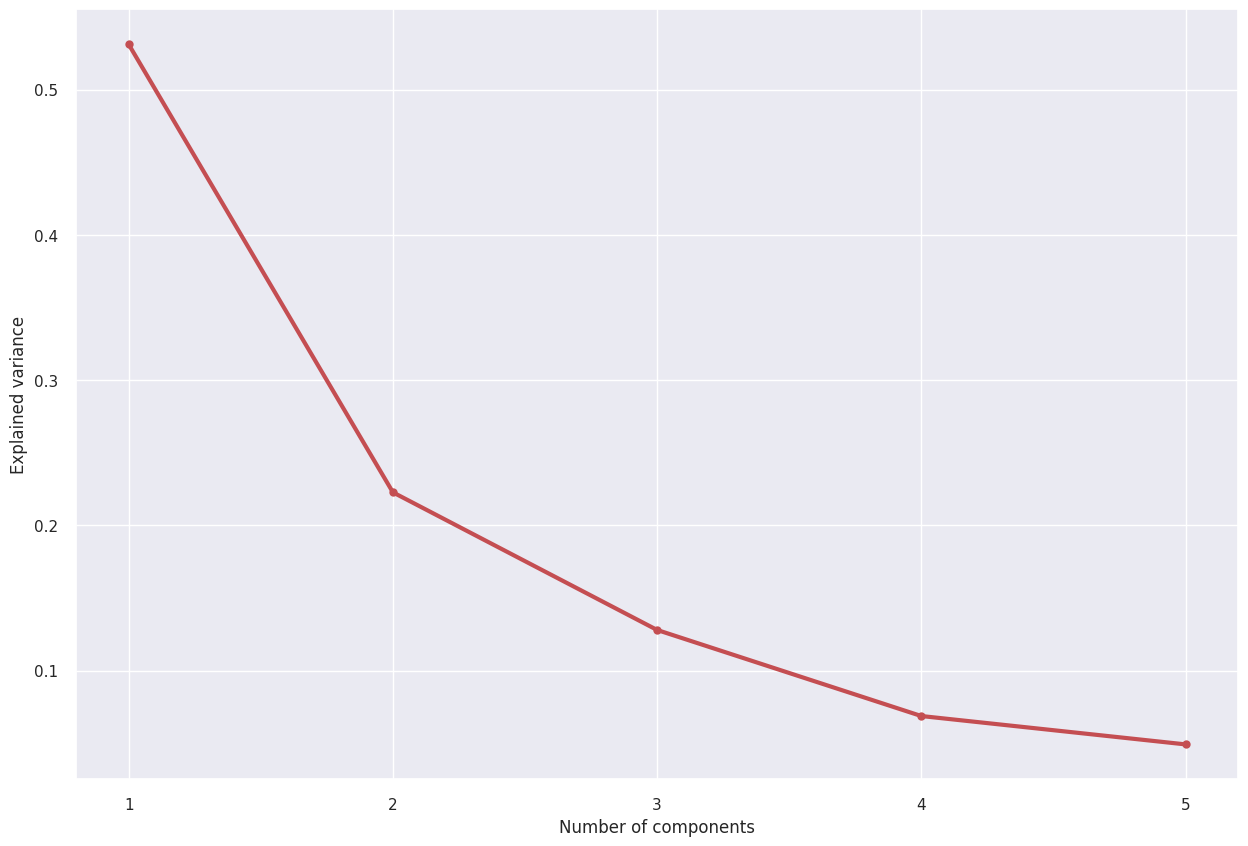

In [75]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

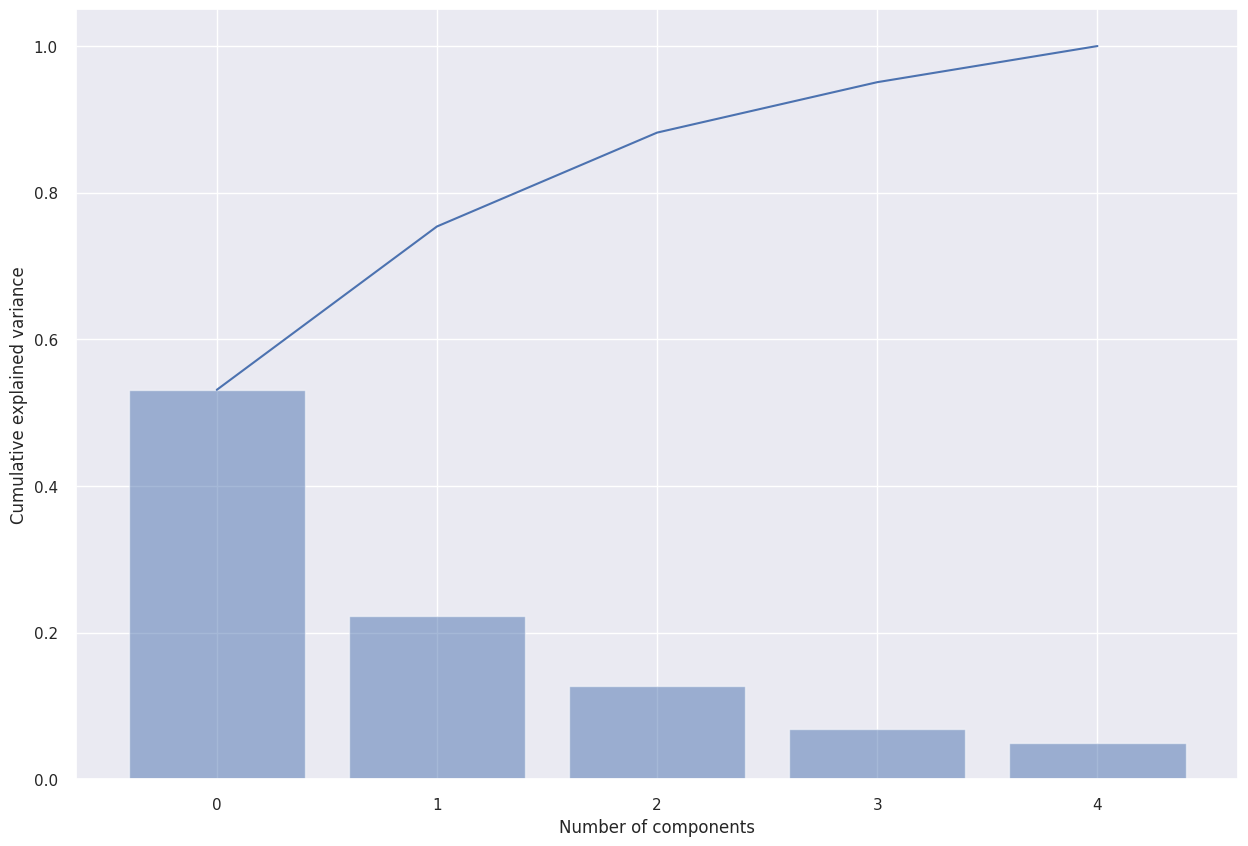

In [76]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

NameError: ignored

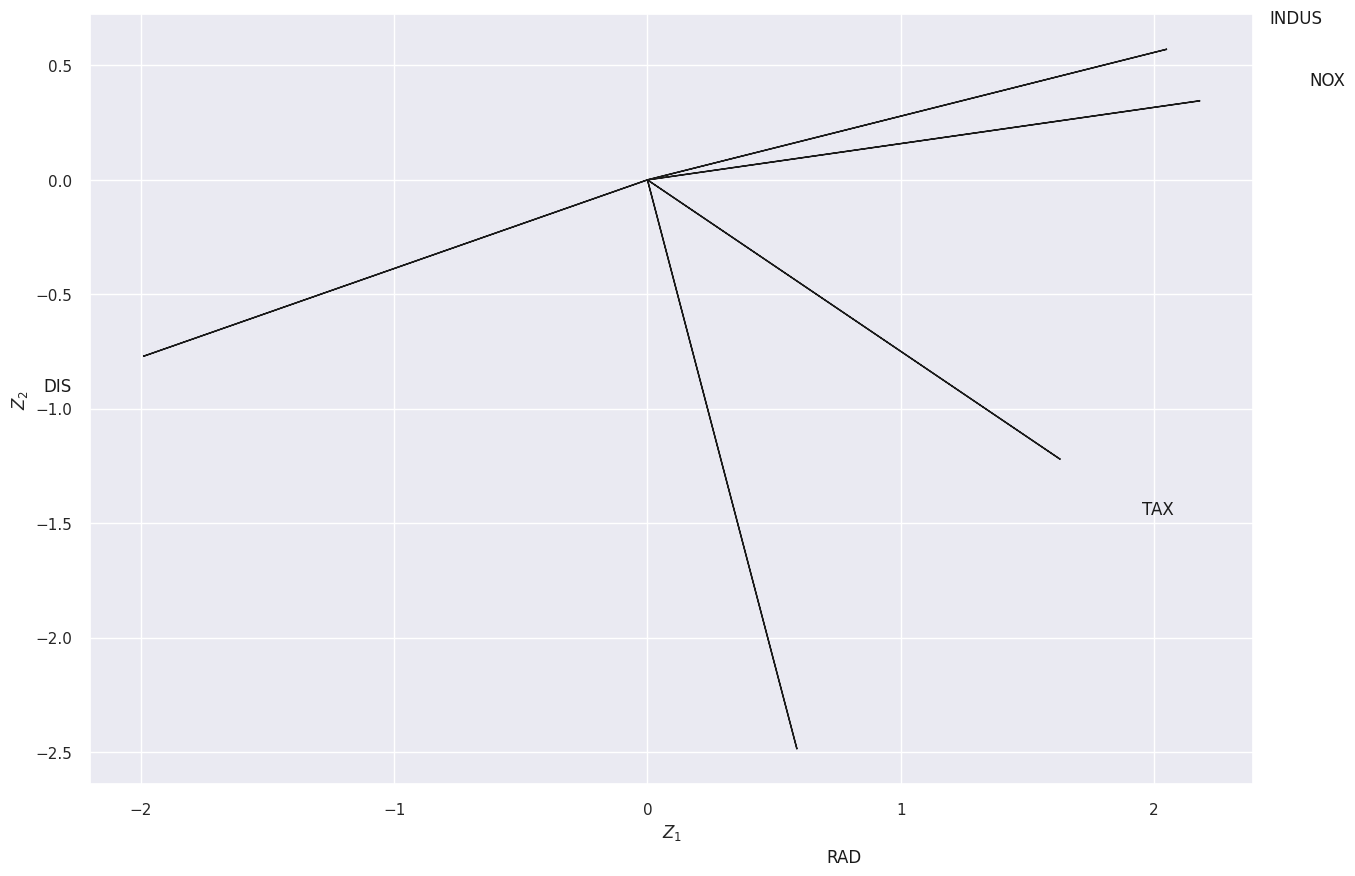

In [77]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [78]:
!pip install pca

In [79]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [80]:
out['PC']

,PC1,PC2,PC3,PC4
0,3.979700,0.281614,-0.210879,-0.147980
1,-0.008456,0.288468,-0.002593,-0.166771
2,0.104386,0.347546,-0.105088,-0.254954
3,3.880856,0.229865,-0.121097,-0.070736
4,0.053053,0.320671,-0.058462,-0.214839
...,...,...,...,...
294,-1.777054,0.371068,-0.596193,-0.007474
295,0.368531,-1.712595,-1.427668,-0.011941
296,0.656181,0.338320,-1.669133,-0.843104
297,0.136886,0.178510,-1.375237,-0.645109


**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (53.1% expl.var)', ylabel='PC2 (22.2% expl.var)'>)

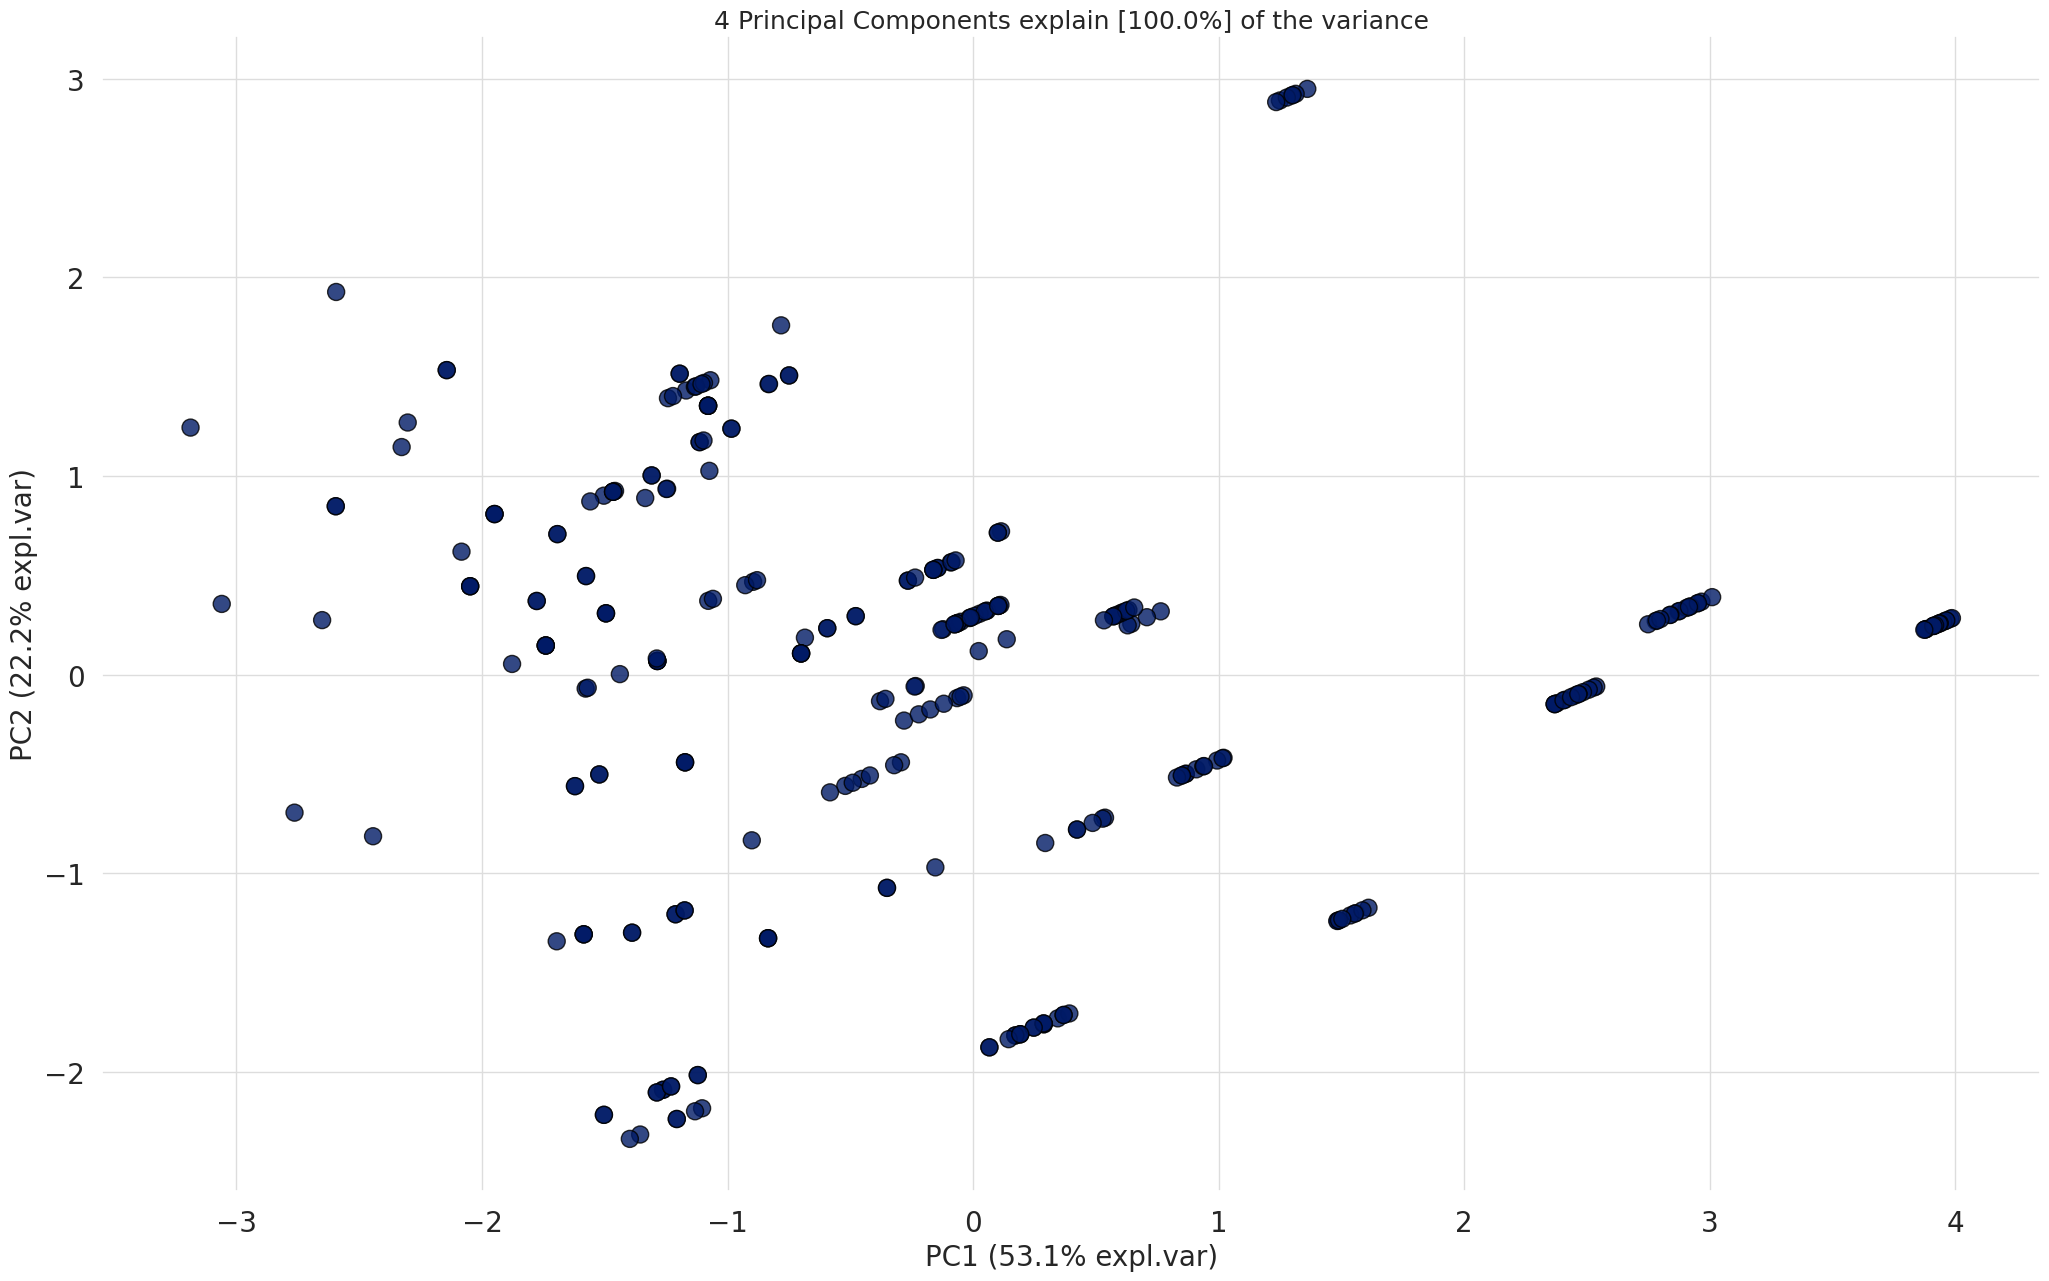

In [81]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [82]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4
INDUS,0.513756,0.193333,0.265604,0.767581
DIS,-0.498595,-0.261035,0.452879,0.389640
NOX,0.546659,0.117069,-0.228214,-0.113547
RAD,0.147931,-0.842500,-0.448081,0.249951
TAX,0.408337,-0.413487,0.686657,-0.428521


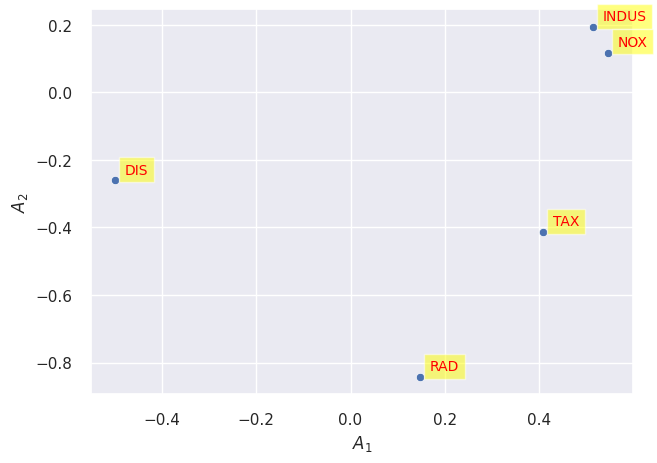

In [83]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

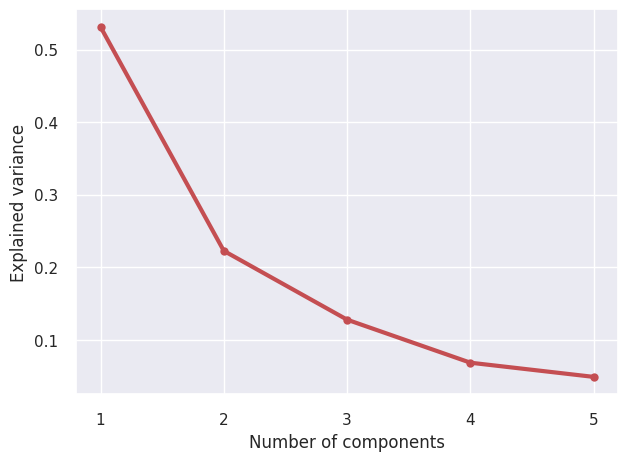

In [84]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

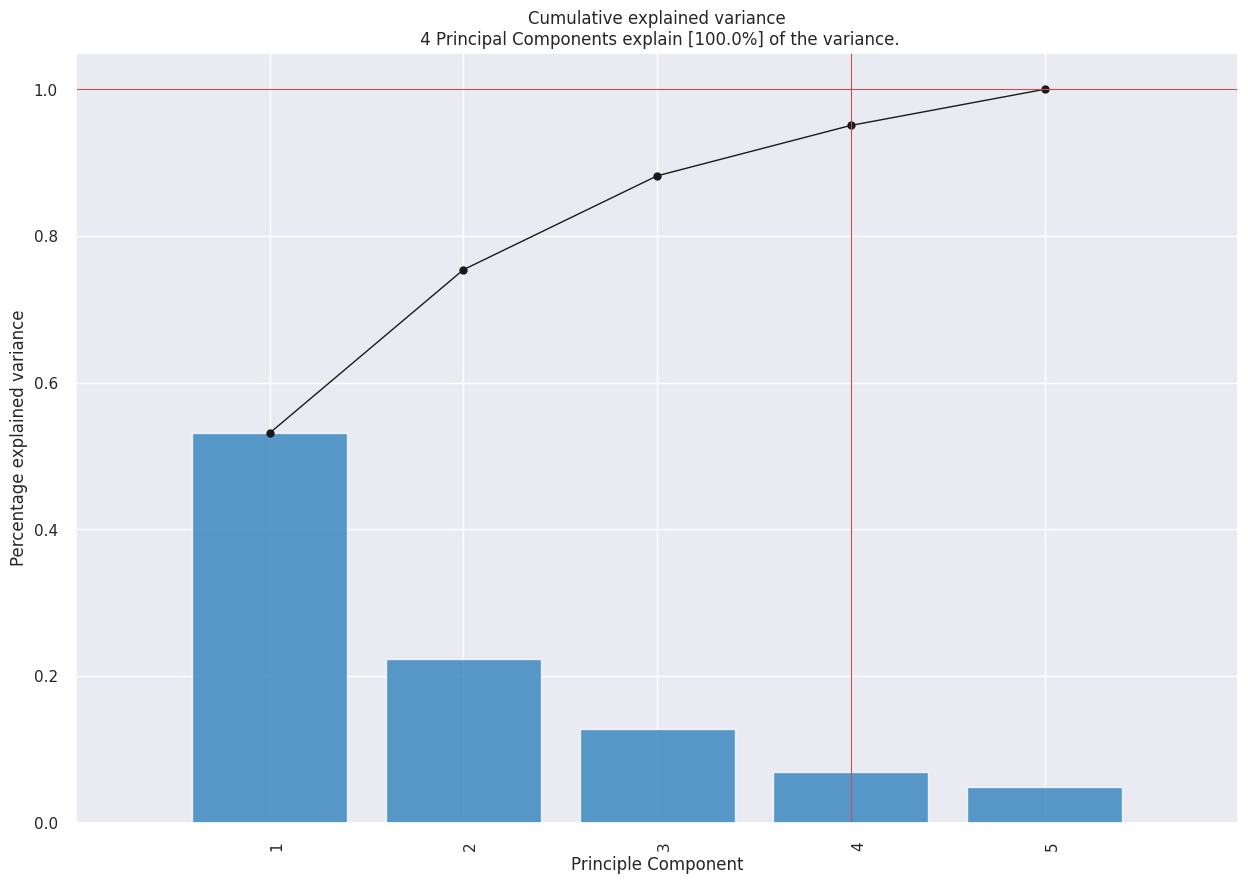

In [85]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (53.1% expl.var)', ylabel='PC2 (22.2% expl.var)'>)

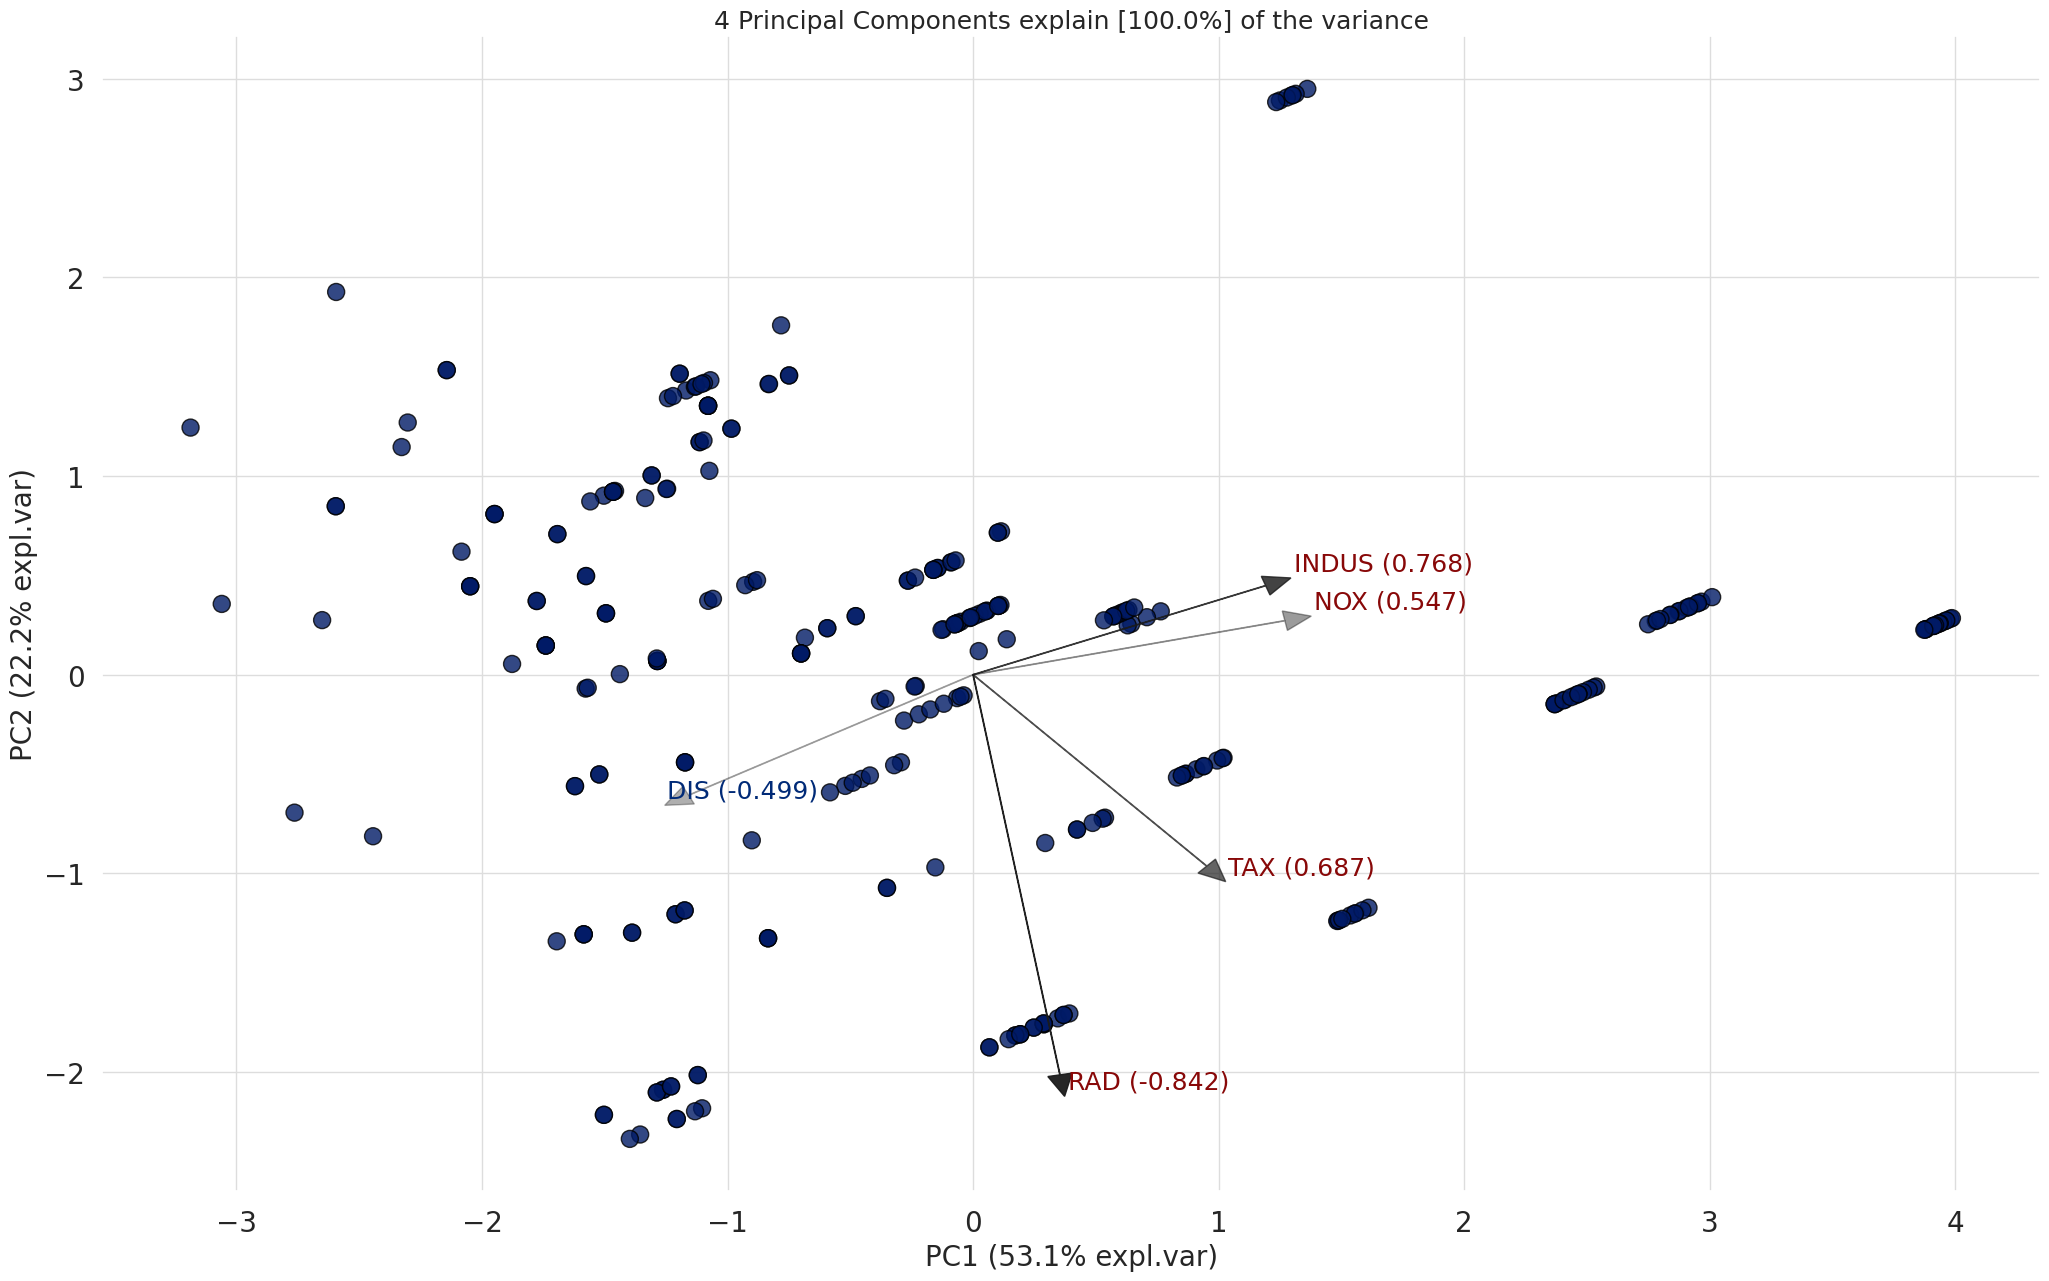

In [86]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (53.1% expl.var)', ylabel='PC2 (22.2% expl.var)', zlabel='PC3 (12.8% expl.var)'>)

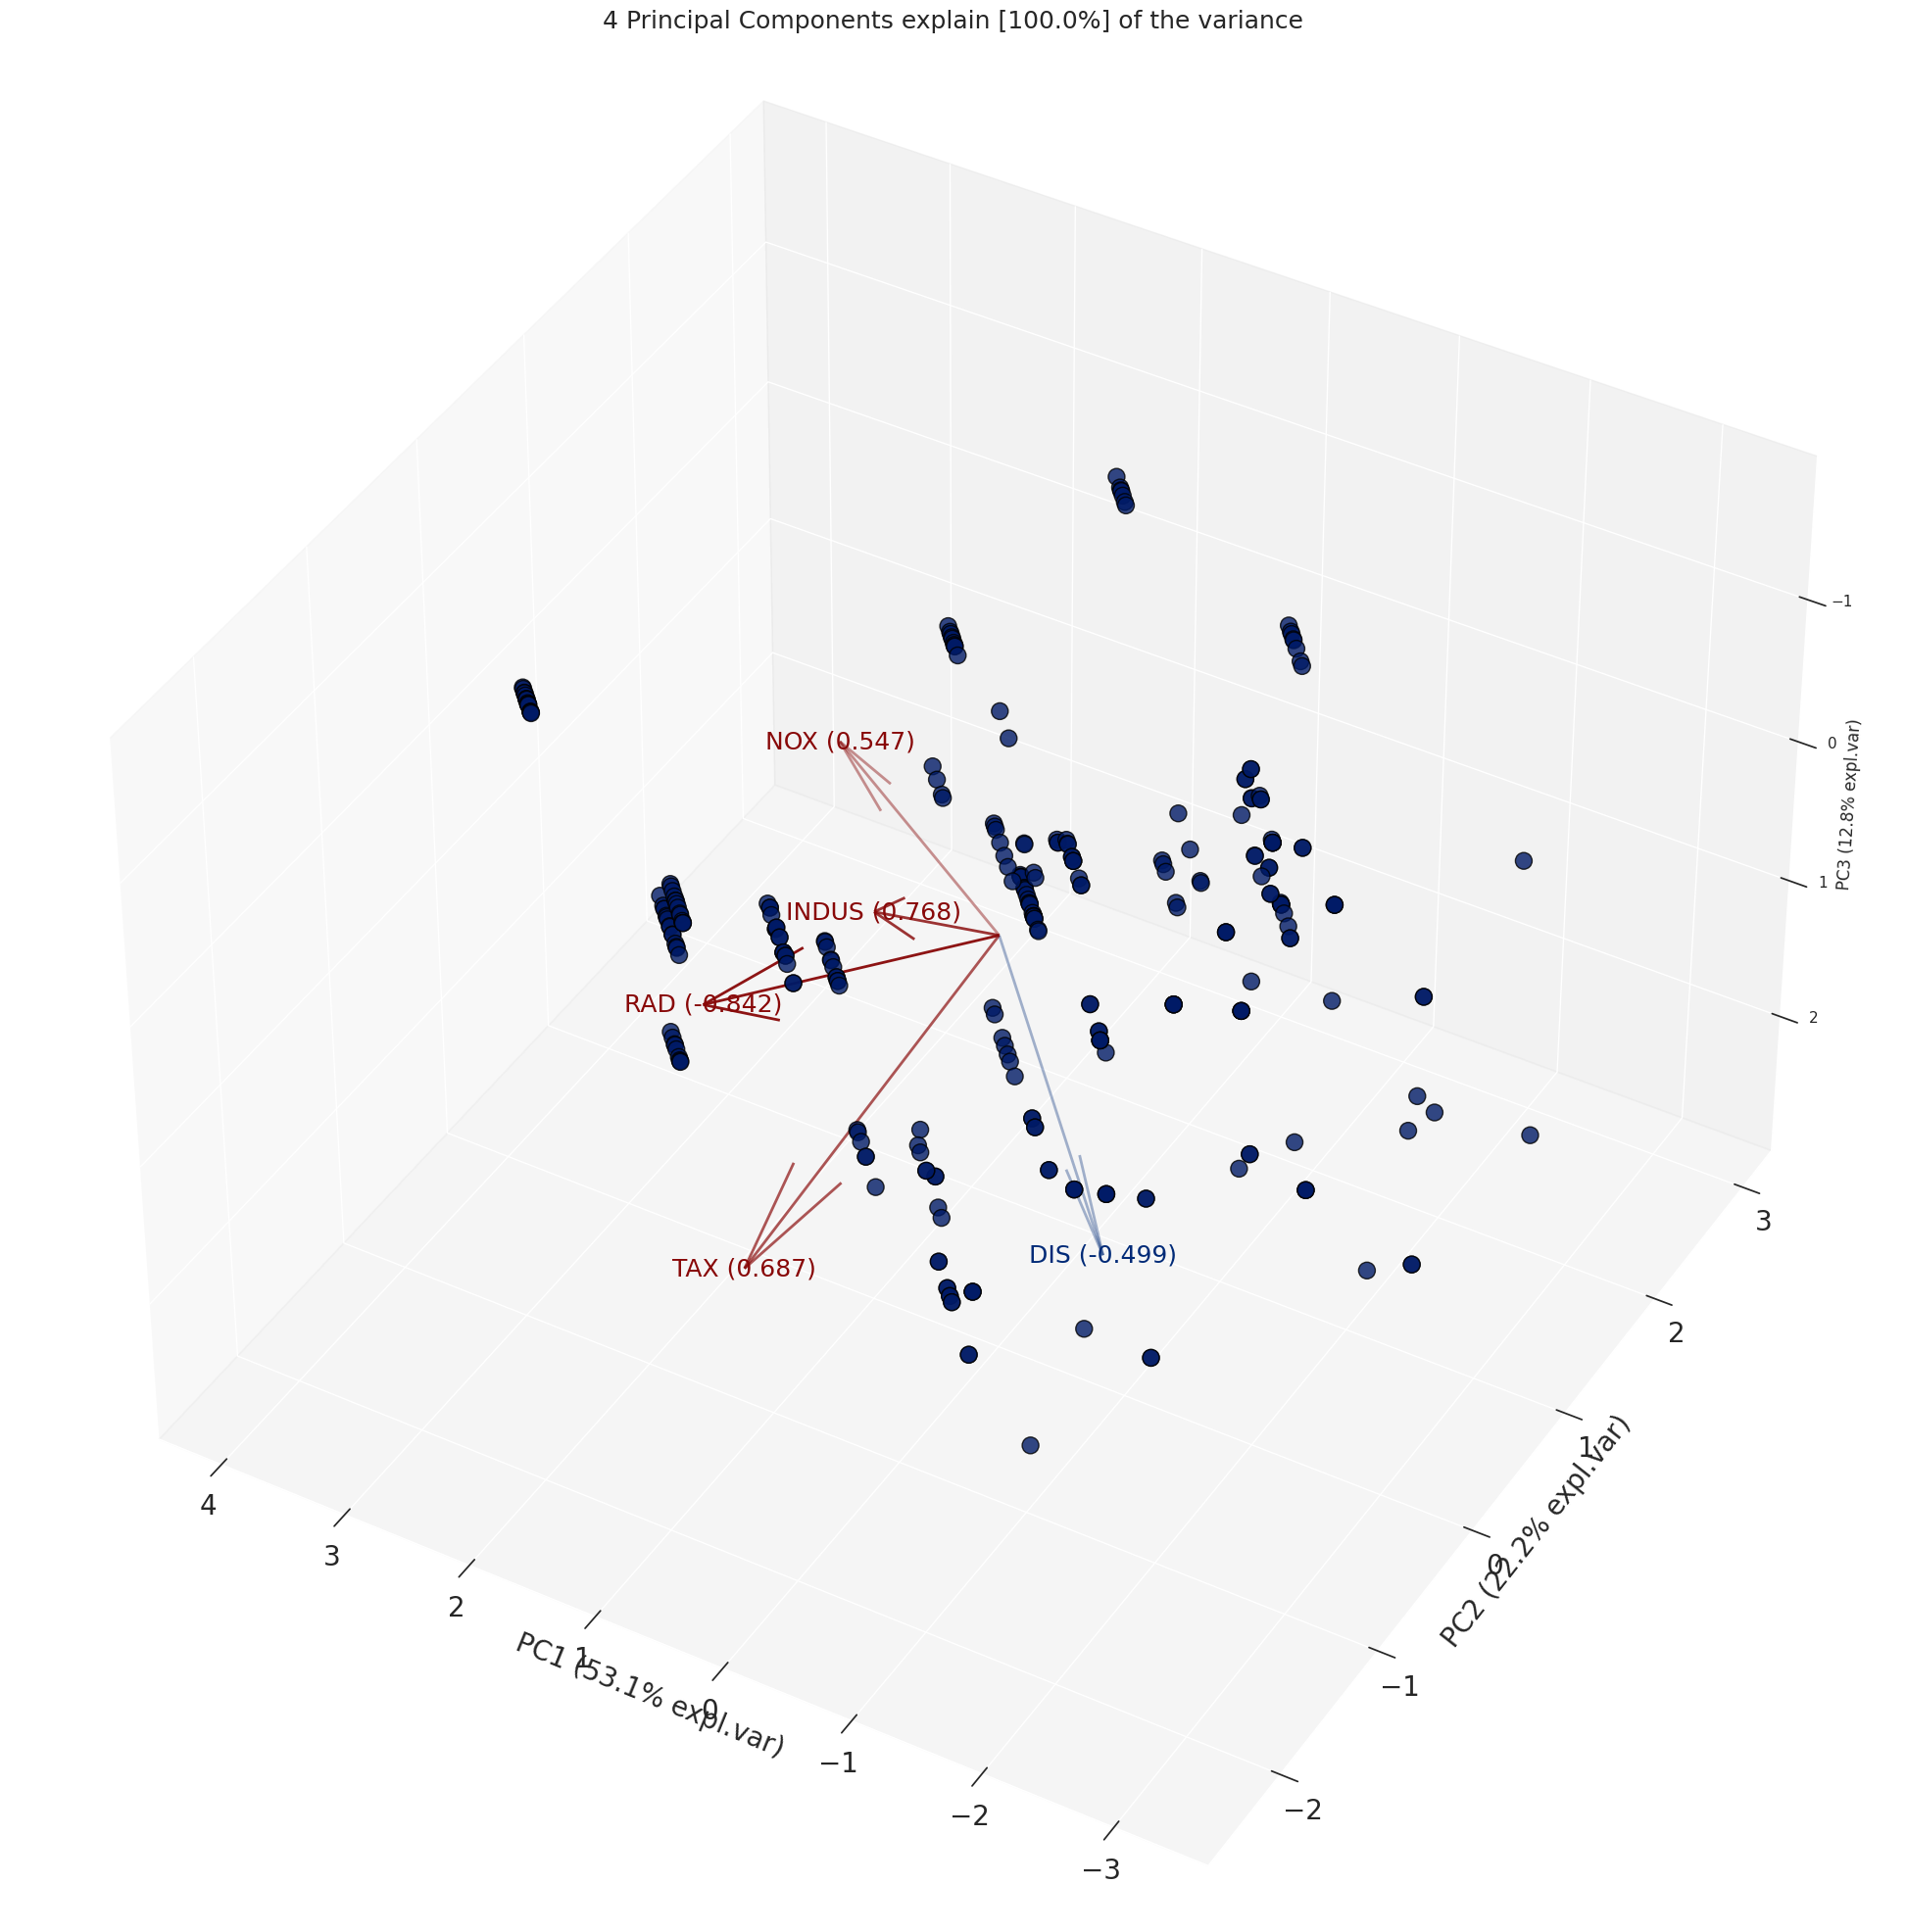

In [87]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [88]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [89]:
#For Google Colab only
from pycaret.utils import enable_colab
enable_colab()

ImportError: ignored

In [90]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (269, 6)
Unseen Data For Predictions: (30, 6)


In [91]:
from pycaret.classification import *
clf = setup(data=data, target='MEDV-result', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,MEDV-result
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(269, 6)"
5,Transformed data shape,"(269, 6)"
6,Transformed train set shape,"(188, 6)"
7,Transformed test set shape,"(81, 6)"
8,Numeric features,5
9,Preprocess,True


**Comparing All Models**

In [92]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7380,0.8111,0.7380,0.7312,0.7252,0.4793,0.4908,0.6050
gbc,Gradient Boosting Classifier,0.7333,0.8197,0.7333,0.7252,0.7207,0.4717,0.4855,0.2880
rf,Random Forest Classifier,0.7327,0.8455,0.7327,0.7381,0.7261,0.4902,0.5015,0.3920
xgboost,Extreme Gradient Boosting,0.7222,0.8269,0.7222,0.7186,0.7112,0.4526,0.4652,0.0970
et,Extra Trees Classifier,0.7111,0.8309,0.7111,0.7161,0.7023,0.4497,0.4625,0.1770
knn,K Neighbors Classifier,0.7058,0.7898,0.7058,0.6794,0.6695,0.3833,0.4062,0.0510
dt,Decision Tree Classifier,0.6956,0.7372,0.6956,0.6958,0.6874,0.4226,0.4305,0.0350
lr,Logistic Regression,0.6643,0.7717,0.6643,0.6082,0.6172,0.2910,0.3116,0.8130
lda,Linear Discriminant Analysis,0.6643,0.7706,0.6643,0.6271,0.6173,0.3061,0.3310,0.0360
ada,Ada Boost Classifier,0.6640,0.7743,0.6640,0.6587,0.6523,0.3438,0.3521,0.1180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [93]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

 Create a Model

**Create model with K-nearest neighbour**

In [ ]:
knn = create_model('knn')

**Tune model with K-nearest neighbour**

In [ ]:
tuned_knn = tune_model(knn)

In [ ]:
tuned_knn

**Evaluate model with K-nearest neighbour**

In [ ]:
evaluate_model(tuned_knn)

In [95]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [94]:
clf_pca = setup(data=data, target='MEDV-result', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,MEDV-result
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(269, 6)"
5,Transformed data shape,"(269, 4)"
6,Transformed train set shape,"(188, 4)"
7,Transformed test set shape,"(81, 4)"
8,Numeric features,5
9,Preprocess,True


# **Comparing Models**

In [96]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7284,0.8328,0.7284,0.7236,0.7166,0.4720,0.4847,0.2740
rf,Random Forest Classifier,0.7064,0.8485,0.7064,0.7025,0.6945,0.4348,0.4461,0.6500
gbc,Gradient Boosting Classifier,0.7058,0.8153,0.7058,0.7050,0.6956,0.4340,0.4437,0.6670
et,Extra Trees Classifier,0.7009,0.8198,0.7009,0.7091,0.6930,0.4264,0.4381,0.4650
xgboost,Extreme Gradient Boosting,0.6848,0.8126,0.6848,0.6946,0.6799,0.4045,0.4190,0.1880
dt,Decision Tree Classifier,0.6740,0.7192,0.6740,0.6811,0.6677,0.3868,0.3952,0.0770
knn,K Neighbors Classifier,0.6737,0.7610,0.6737,0.5993,0.6268,0.3313,0.3521,0.1410
lr,Logistic Regression,0.6702,0.7683,0.6702,0.6410,0.6236,0.2961,0.3228,0.1510
nb,Naive Bayes,0.6649,0.7706,0.6649,0.6326,0.6355,0.3089,0.3226,0.0840
lda,Linear Discriminant Analysis,0.6649,0.7643,0.6649,0.6495,0.6182,0.2880,0.3226,0.1370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [97]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

# **Tune Best Model**

In [98]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.8961,0.7368,0.7331,0.7215,0.4444,0.4556
1,0.5789,0.8209,0.5789,0.5789,0.5789,0.1915,0.1915
2,0.7368,0.9060,0.7368,0.6660,0.6993,0.4571,0.4671
3,0.7895,0.8622,0.7895,0.8386,0.7333,0.5529,0.6108
4,0.7368,0.8885,0.7368,0.7186,0.7254,0.4751,0.4783
5,0.7895,0.8177,0.7895,0.7026,0.7368,0.5280,0.5659
6,0.7368,0.8441,0.7368,0.7368,0.7368,0.4947,0.4947
7,0.5789,0.8078,0.5789,0.5385,0.5579,0.1461,0.1472
8,0.8333,0.8466,0.8333,0.8556,0.8386,0.6932,0.6981


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# **Evaluate Best Model**

In [99]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [100]:
lightgbm_pca = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.9173,0.8421,0.8370,0.8365,0.6851,0.6896
1,0.6316,0.7532,0.6316,0.6571,0.6426,0.3179,0.3197
2,0.7368,0.8985,0.7368,0.7057,0.7111,0.4974,0.5168
3,0.8421,0.9104,0.8421,0.8747,0.8176,0.6780,0.7099
4,0.6842,0.8096,0.6842,0.6397,0.6611,0.3596,0.3623
5,0.7895,0.8252,0.7895,0.7026,0.7368,0.5280,0.5659
6,0.7368,0.8397,0.7368,0.7714,0.7448,0.5297,0.5411
7,0.6316,0.8622,0.6316,0.6140,0.6220,0.2811,0.2827
8,0.7778,0.8056,0.7778,0.8091,0.7823,0.6022,0.6138


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [101]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.8961,0.7368,0.7331,0.7215,0.4444,0.4556
1,0.5789,0.8209,0.5789,0.5789,0.5789,0.1915,0.1915
2,0.7368,0.9060,0.7368,0.6660,0.6993,0.4571,0.4671
3,0.7895,0.8622,0.7895,0.8386,0.7333,0.5529,0.6108
4,0.7368,0.8885,0.7368,0.7186,0.7254,0.4751,0.4783
5,0.7895,0.8177,0.7895,0.7026,0.7368,0.5280,0.5659
6,0.7368,0.8441,0.7368,0.7368,0.7368,0.4947,0.4947
7,0.5789,0.8078,0.5789,0.5385,0.5579,0.1461,0.1472
8,0.8333,0.8466,0.8333,0.8556,0.8386,0.6932,0.6981


In [102]:
evaluate_model(tuned_lightgbm_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf_pca = create_model('rf')

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

In [ ]:
tuned_rf_pca

In [ ]:
evaluate_model(tuned_rf_pca)

In [ ]:
et_pca = create_model('et')

In [ ]:
tuned_et_pca = tune_model(et_pca)

In [ ]:
tuned_et_pca

In [ ]:
!pip install scipy==1.8.1

In [ ]:
evaluate_model(tuned_et_pca)

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [ ]:
et_pca = create_model('et')

In [ ]:
tuned_et_pca = tune_model(et_pca)

In [ ]:
tuned_et_pca

In [ ]:
evaluate_model(tuned_et_pca)

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
!pip install "pycaret[analysis]"

In [ ]:
!pip install shap

In [ ]:
!pip install shap
import shap
from pycaret.classification import *

In [ ]:
interpret_model(tuned_et_pca, plot='summary')

In [ ]:
interpret_model(tuned_et_pca, plot='summary')

In [ ]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_et_pca, plot='reason')